# Setup

In [1]:
import contracts
contracts.disable_all()

In [2]:
import duckietown_world as dw
from duckietown_world.svg_drawing.ipython_utils import ipython_draw_html
import geometry as g
import numpy as np
import networkx as nx
import copy

INFO:dt-world:duckietown-world 1.0.15
DEBUG:dt-serialization:Registering class Serializable
DEBUG:dt-serialization:Registering class GenericData
DEBUG:dt-serialization:Registering class Sequence
DEBUG:dt-serialization:Registering class SampledSequence
DEBUG:dt-serialization:Registering class Constant
DEBUG:dt-serialization:Registering class RectangularArea
DEBUG:dt-serialization:Registering class TransformSequence
DEBUG:dt-serialization:Registering class VariableTransformSequence
DEBUG:dt-serialization:Registering class SE2Transform
DEBUG:dt-serialization:Registering class Scale2D
DEBUG:dt-serialization:Registering class Matrix2D
DEBUG:dt-serialization:Registering class SpatialRelation
DEBUG:dt-serialization:Registering class GroundTruth
DEBUG:dt-serialization:Registering class PlacedObject
DEBUG:dt-serialization:Registering class EvaluatedMetric
DEBUG:dt-serialization:Registering class GenericObject
DEBUG:dt-serialization:Registering class Duckie
DEBUG:dt-serialization:Registering cla

In [3]:
dw.logger.setLevel(50)

Better visualization of output

In [4]:
%%html
<style>
pre {line-height: 90%}
</style>

# Road Network
Let's load a map and compute the road network.

In [5]:
m = dw.load_map('4way')


Use the function `get_skeleton_graph`:

In [6]:
sk = dw.get_skeleton_graph(m)

The return type is `SkeletonGraphResult`. It contains in `sk.root2` a new map with the joined lane segments. 

In [7]:
ipython_draw_html(sk.root2);

While in the attribute `sk.G` we find a graph describing the topology.

This is a graph where each node is a meeting point between lanes, and each edge represents a lane.

In [18]:
import sys
sys.path.append("/home/jose/code/duckietown/duckietown-uplan/lib-uplan/")
import utils.augmentation as aug

aug_graph = aug.vanilla_augment_graph(sk.G)
aug_graph_more  = aug.augment_graph(sk.G, num_right=1, num_left=2, dist=0.1)

P61_0
P75_0
P68_0
P12_0
P14_0
P34_0
P37_0
P19_0
P17_0
P44_0
P71_0
P54_0
P24_0
P62_0
P76_0
P15_0
P22_0
P32_0
P79_0
P67_0
P31_0
P13_0
P69_0
P1_0
P41_0
P35_0
P53_0
P16_0
P55_0
P25_0
P5_0
P64_0
P49_0
P52_0
P56_0
P36_0
P78_0
P27_0
P43_0
P4_0
P45_0
P20_0
P7_0
P3_0
P46_0
P77_0
P47_0
P0_0
P59_0
P26_0
P33_0
P66_0
P10_0
P57_0
P60_0
P40_0
P70_0
P39_0
P2_0
P6_0
P58_0
HOLA
P63_0
P38_0
P73_0
P11_0
P74_0
P28_0
P18_0
P21_0
P23_0
P48_0
P9_0
P51_0
P65_0
P73_0
P8_0
P30_0
P50_0
P20_0
P72_0
P29_0
P78_0
P16_0
P42_0


In [9]:
hola= "hola_0"

In [10]:
hola[:-2]

'hola'

Let's bring in the `draw_graph` function from some time ago.

In [19]:
def draw_graph(G0, pos=None):
    import networkx as nx
    from matplotlib import pyplot as plt
    pos = pos or nx.spring_layout(G0)
    plt.figure(figsize=(12, 12))    
    nx.draw(G0,pos,labels={}, node_size=10) # node:node for node in G0.nodes()
    nx.draw_networkx_edge_labels(G0,pos,edge_labels={},font_color='red')
    plt.axis('off')
    plt.show()

Set the position of each node in the graph based on the attribute 'point'.

In [20]:
%matplotlib inline

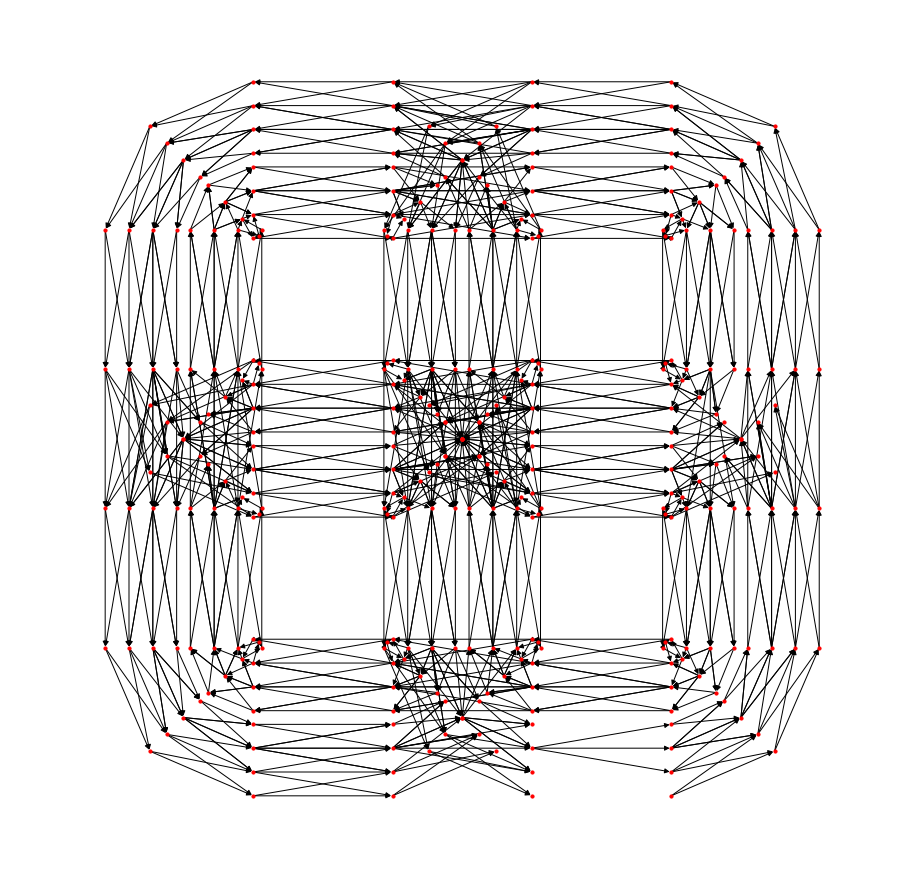

In [21]:
import geometry as geo
pos = {}
for n in aug_graph_more:
    q = aug_graph_more.nodes[n]['point'].as_SE2()
    t, _ = geo.translation_angle_from_SE2(q)
    pos[n] = t
draw_graph(aug_graph_more, pos=pos)

We find the shortest path:

In [ ]:
import networkx as nx
path = nx.shortest_path(sk.G, start, end)
print(path)